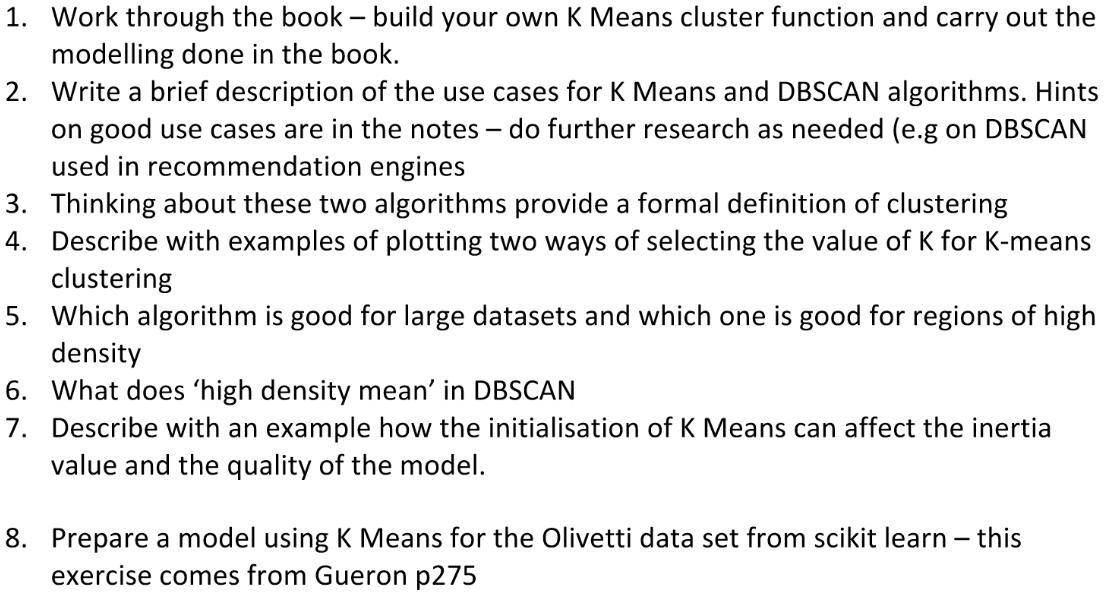

# Building the K Means Cluster function

1. Start with a set of k-means, which are points in d-dimensional space.
2. Assign each point to the mean to which it is closest.
3. If no point's assignment has changed, stop and keep the clusters.
4. If some point's assignment has changed, recompute the means and return to step 2.

In [1]:
def scalar_multiply(c, v):
 """c is a number, v is a vector"""
 return [c * v_i for v_i in v]

In [2]:
def vector_mean(vectors):
 """compute the vector whose ith element is the mean of the
 ith elements of the input vectors"""
 n = len(vectors)
 return scalar_multiply(1/n, vector_sum(vectors))

In [3]:
def vector_add(v, w):
 """adds corresponding elements"""
 return [v_i + w_i
 for v_i, w_i in zip(v, w)]

In [4]:
def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
        return result

# Creating a helper function that mesures how many coordinates two vectors differ in.
from typing import List
Vector = List[float]

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])


**Function that, given some vectors and their assignment to clusters computes the mean of the clusters**

def cluster_means(k: int, inputs: List[Vector], assignments: List[int]) ->List[Vector]:
    
    # Clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        cluster[assignment].append(input)
        
    # If a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

***

def vector_subtract(v, w):
 """subtracts corresponding elements"""
 return [v_i - w_i for v_i, w_i in zip(v, w)]

def squared_distance(v, w):
 """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
 return sum_of_squares(vector_subtract(v, w))


def dot(v, w):
 """v_1 * w_1 + ... + v_n * w_n"""
 return sum(v_i * w_i
 for v_i, w_i in zip(v, w))

def sum_of_squares(v):
 """v_1 * v_1 + ... + v_n * v_n"""
 return dot(v, v)


def squared_distance(v, w):
    """(v_1 - w_1)  2 + ... + (v_n - w_n)  2"""
    return sum_of_squares(vector_subtract(v, w))

***

In [5]:
from linear_algebra import Vector, vector_mean
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [6]:
from typing import List
from linear_algebra import Vector, vector_mean

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [7]:
def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [8]:
import itertools
import random
import tqdm
from linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

Cluster = Union[Leaf, Merged]

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

from linear_algebra import distance
from typing import Callable

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])


def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')  # was never merged
    else:
        return cluster.order

from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]

        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters


In [9]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

random.seed(12)                   # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)   # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect.
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1



changed: 5 / 20: : 1it [00:00, 333.86it/s]
changed: 4 / 20: : 2it [00:00, 376.68it/s]


0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 499.02it/s]
changed: 2 / 20: : 2it [00:00, 697.71it/s]
changed: 2 / 20: : 2it [00:00, 574.01it/s]
changed: 2 / 20: : 4it [00:00, 442.40it/s]
changed: 1 / 20: : 3it [00:00, 374.60it/s]
changed: 1 / 20: : 5it [00:00, 69.45it/s]
changed: 4 / 20: : 2it [00:00, 250.80it/s]
changed: 2 / 20: : 3it [00:00, 602.40it/s]
changed: 4 / 20: : 3it [00:00, 428.40it/s]
changed: 1 / 20: : 3it [00:00, 374.90it/s]
changed: 1 / 20: : 3it [00:00, 295.26it/s]
changed: 1 / 20: : 3it [00:00, 272.84it/s]
changed: 1 / 20: : 3it [00:00, 313.98it/s]
changed: 1 / 20: : 4it [00:00, 307.86it/s]
changed: 3 / 20: : 3it [00:00, 428.56it/s]
changed: 1 / 20: : 4it [00:00, 333.45it/s]
changed: 3 / 20: : 3it [00:00, 272.95it/s]
changed: 3 / 20: : 3it [00:00, 333.38it/s]
changed: 1 / 20: : 5it [00:00, 357.06it/s]


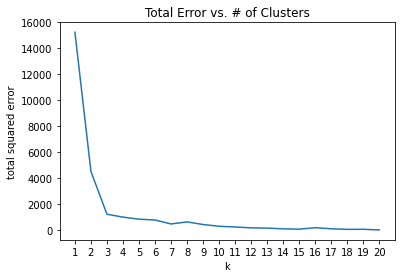

In [10]:
from matplotlib import pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

# Clustering Colors

In [11]:
#!pip install pillow

In [12]:
image_path = r"penguin-chick_400x400.jpg"
import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256 # rescale to between 0 and 1

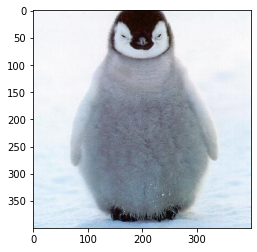

In [13]:
plt.imshow(img)

In [14]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [15]:
# .tolist() converts a NumPy array to Python list
pixels = [pixel.tolist() for row in img for pixel in row]

In [16]:
clusterer = KMeans(5)
clusterer.train(pixels)

changed: 2 / 160000: : 34it [01:18,  2.30s/it]    


In [17]:
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel) #Index the closest cluster
    return clusterer.means[cluster] # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
          for row in img] # for each row in the image

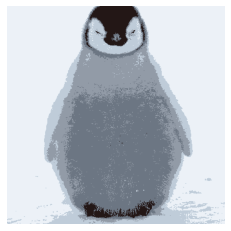

In [18]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

# Bottom-Up Hierarchical Clustering

In [19]:
from typing import NamedTuple, Union

class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10,  20])
leaf2 = Leaf([30, -15])

In [20]:
class Merged(NamedTuple):
    children: tuple
    order: int        

In [21]:
merged = Merged((leaf1, leaf2), order=1)
Cluster = Union[Leaf, Merged]

In [22]:
# Helper function that recursively returns all values containd in a (possibly merged) cluster

def get_values(cluster: Cluster)-> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value for child in cluster.children for value in get_values(child)]
    
assert get_values(merged) == [[10, 20], [30, -15]]

In [23]:
from typing import Callable
from linear_algebra import distance

def cluster_distance(cluster1: Cluster, cluster2: Cluster, distance_agg: Callable = min) -> float:
    """
    Compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2) for v1 in get_values(cluster1) for v2 in get_values(cluster2)])

In [24]:
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf') # was never merged
    else:
        return cluster.order

In [25]:
def get_children(cluster: Cluster):
    if isinstance(cluster,Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

In [26]:
from typing import Tuple
def bottom_up_cluster(inputs: List[Vector], distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]
        
    def pari_distance(pair: Tupel[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)
    
    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # Find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                     for i, cluster1 in enumerate(clusters)
                     for cluster2 in clusters[:i]),
                    key=pair_distance)
        
        # Remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]
        
        # Merge them, using merge_order = # of clusters left
        merge_cluster = Merged((c1, c2), order= len(clusters))
        
        # and add their merge
        clusters.append(merged_cluster)
    
    #When there's only one cluster left, return it
    return clusters[0]

In [27]:
from typing import Tuple
def generate_clusters(base_cluster: Cluster, num_clusters: int) -> List[Cluster]:
    # Start with a list with just the base cluster
    clusters = [base_cluster]
    
    # As long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        #Choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        
        # Remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        
        # And add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))
        
        # Once we have enough clusters...
        return clusters

In [35]:
from typing import Tuple
base_cluster = bottom_up_cluster(inputs)

three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]

for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

NameError: name 'Tupel' is not defined